# Train and Validation Split

In [ ]:
import os
import shutil
import random

# Set the path to your augmented dataset folder
augmented_data_folder = '/kaggle/input/emotion-recognition/Dataset/train'

# Set the path to your destination folder for the training and validation sets
output_folder = '/kaggle/working/FEC_BA_train_test_validation'

# Create the destination folders for training and validation
train_folder = os.path.join(output_folder, 'train')
val_folder = os.path.join(output_folder, 'validation')
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# List of subfolders (each representing a class)
subfolders = os.listdir(augmented_data_folder)

# Specify the percentage split (85% for training, 15% for validation)
train_percentage = 0.85
val_percentage = 0.15

# Iterate through each subfolder (class)
for subfolder in subfolders:
    class_folder = os.path.join(augmented_data_folder, subfolder)
    
    # Create subfolders for the class in the destination folders
    train_class_folder = os.path.join(train_folder, subfolder)
    val_class_folder = os.path.join(val_folder, subfolder)
    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(val_class_folder, exist_ok=True)
    
    # List all files in the class folder
    files = os.listdir(class_folder)
    
    # Calculate the number of files for training and validation
    num_files = len(files)
    num_train = int(train_percentage * num_files)
    num_val = num_files - num_train
    
    # Randomly shuffle the files
    random.shuffle(files)
    
    # Copy files to training and validation folders
    for i, file in enumerate(files):
        src_path = os.path.join(class_folder, file)
        if i < num_train:
            dst_path = os.path.join(train_class_folder, file)
        else:
            dst_path = os.path.join(val_class_folder, file)
        shutil.copy(src_path, dst_path)

# Print the number of images in each class and each directory
for folder in [train_folder, val_folder]:
    subfolders = os.listdir(folder)
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder, subfolder)
        num_images = len(os.listdir(subfolder_path))
        print(f"Number of images in {subfolder}: {num_images}")

print("Data splitting complete.")


In [ ]:
import shutil

# Source directory to copy
source_directory = '/kaggle/input/emotion-recognition/Dataset/test'

# Destination directory where you want to copy
destination_directory = '/kaggle/working/FEC_BA_train_test_validation/test'

try:
    shutil.copytree(source_directory, destination_directory)
    print(f"Directory '{source_directory}' and its contents copied to '{destination_directory}' successfully.")
except OSError as e:
    print(f"Error: {e}")


In [ ]:
import zipfile
import os
from IPython.display import FileLink

def zip_dir(directory=os.getcwd(), file_name='directory.zip'):
    """
    Zip all the files in a directory
    
    Parameters
    ----------
    directory : str
        Directory to be zipped. Default is the current working directory.
        
    file_name : str
        The name of the zipped file (including .zip). Default is 'directory.zip'.
        
    Returns
    -------
    A hyperlink that can be used to download the zip file.
    """
    os.chdir(directory)
    zip_ref = zipfile.ZipFile(file_name, mode='w')
    for folder, _, files in os.walk(directory):
        for file in files:
            if file_name in file:
                pass
            else:
                zip_ref.write(os.path.join(folder, file))

    return FileLink(file_name)

# Define the directory to be zipped (Kaggle working directory)
directory_to_zip = '/kaggle/working'

# Specify the name of the output ZIP file
zip_file_name = 'kaggle_working_directory.zip'

# Zip the directory and provide a download link
zip_link = zip_dir(directory=directory_to_zip, file_name=zip_file_name)
zip_link


# Normalization

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Here, we are normalizing the pixel values to the range [0, 1]
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Set the batch size for the data generator
batch_size = 32

# Define the directories for the train, validation, and test sets
train_directory = '/kaggle/input/fec-ba/FEC_BA_train_test_validation/train'
validation_directory = '/kaggle/input/fec-ba/FEC_BA_train_test_validation/validation'
test_directory = '/kaggle/input/fec-ba/FEC_BA_train_test_validation/test'

# Specify the class names explicitly as strings
class_names = ['angry','disgust','fear','happy','neutral','sad','surprise']

# Create the image generators for the train, validation, and test sets
train_generator = datagen.flow_from_directory(
    train_directory,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_names,
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    validation_directory,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_names,
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    test_directory,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_names,
    shuffle=False
)

Found 24399 images belonging to 7 classes.
Found 4310 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# CNN

# CNN Model1

In [ ]:
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

num_classes = 7

# Build the model
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

# Define the optimizer and compile the model
optimizer = RMSprop(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Define the checkpoint path to save the best model based on validation accuracy
checkpoint_path = "/kaggle/working/model1_checkpoint.h5"

# Define a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

# Train the model with the defined checkpoint callback
history = model.fit(train_generator, validation_data=validation_generator, epochs=40, callbacks=[checkpoint])

# Load the best model based on validation accuracy
model.load_weights(checkpoint_path)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels of the test set
true_labels = test_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Get the predicted probabilities for the test set
y_pred_probabilities = model.predict(test_generator)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

# Get the true class labels for the test set
y_true_labels = test_generator.classes

# Get the class names
class_names = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))


# CNN Model 2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop  # Import the RMSprop optimizer

num_classes = 7

# Define the CNN model
model_1 = Sequential()

# Add convolutional layers with changed filter size
model_1.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48, 48, 1)))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(128, (5, 5), activation='relu'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(256, (3, 3), activation='relu'))
model_1.add(MaxPooling2D((2, 2)))

# Flatten the output
model_1.add(Flatten())

# Add fully connected layers
model_1.add(Dense(512, activation='relu'))
model_1.add(Dropout(0.3))  # Set dropout rate to 30%
model_1.add(Dense(num_classes, activation='softmax'))

# Use RMSprop optimizer instead of 'adam'
optimizer = RMSprop(learning_rate=0.0001)  # Adjust learning rate as needed

# Compile the model with the new optimizer
model_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model_1.summary()

# Define the checkpoint path to save the best model based on validation accuracy
checkpoint_path = "/kaggle/working/model_1_checkpoint.h5"

# Define a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

# Train the model with the defined checkpoint callback
history = model_1.fit(train_generator, validation_data=validation_generator, epochs=50, callbacks=[checkpoint])

# Load the best model based on validation accuracy
model_1.load_weights(checkpoint_path)

# Evaluate the model on the test set
test_loss, test_accuracy = model_1.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the test set
predictions = model_1.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels of the test set
true_labels = test_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Get the predicted probabilities for the test set
y_pred_probabilities = model_1.predict(test_generator)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

# Get the true class labels for the test set
y_true_labels = test_generator.classes

# Get the class names
class_names = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))


# ResNet18

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ResNet-18 architecture
def build_resnet18(input_shape, num_classes):
    input_tensor = Input(shape=input_shape)
    
    # Initial Convolution Layer
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Residual Blocks
    num_blocks = [2, 2, 2, 2]  # Number of residual blocks in each stage
    num_filters = [64, 128, 256, 512]
    
    for stage in range(4):
        for block in range(num_blocks[stage]):
            strides = (1, 1) if stage == 0 and block == 0 else (2, 2)
            y = Conv2D(num_filters[stage], (3, 3), strides=strides, padding='same')(x)
            y = BatchNormalization()(y)
            y = Activation('relu')(y)
            y = Conv2D(num_filters[stage], (3, 3), padding='same')(y)
            y = BatchNormalization()(y)
            
            if strides != (1, 1) or stage != 0:
                # Adjust the dimensions of the shortcut connection
                x = Conv2D(num_filters[stage], (1, 1), strides=strides, padding='valid')(x)
            
            x = tf.keras.layers.add([x, y])
            x = Activation('relu')(x)
    
    # Global Average Pooling and Fully Connected Layer
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=x, name='resnet18')
    return model

# Create the ResNet-18 model
input_shape = (48, 48, 1)  # Grayscale image has only one channel
num_classes = 7  # Replace with the number of classes in your dataset
resnet18_model = build_resnet18(input_shape, num_classes)

# Compile the model
resnet18_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
resnet18_model.summary()

# Define a callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint("best_model_resnet18.h5", monitor="val_accuracy", mode="max", save_best_only=True)

# Train the model
epochs = 30
history = resnet18_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint]
)

# Load the best saved model
resnet18_model.load_weights("best_model_resnet18.h5")

# Evaluate the model on the test set
test_loss, test_accuracy = resnet18_model.evaluate(test_generator, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Model: "resnet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 24, 24, 64)   3200        ['input_7[0][0]']                
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 24, 24, 64)  256         ['conv2d_2[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation (Activation)        (None, 24, 24, 64)   0           ['batch_normalization_1[0]

In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the test set
predictions = resnet18_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels of the test set
true_labels = test_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

225/225 [==============================] - 12s 50ms/step
Confusion Matrix:
[[ 352    6  185   75  126  194   20]
 [  17   47   15    8    5   17    2]
 [  80    4  463   65  119  209   84]
 [  76    1   86 1317  153  102   39]
 [  82    0  177  135  580  232   27]
 [ 124    5  240  104  224  526   24]
 [  21    0  136   55   32   26  561]]


In [21]:
import numpy as np
from sklearn.metrics import classification_report

# Get the predicted probabilities for the test set
y_pred_probabilities = resnet18_model.predict(test_generator)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

# Get the true class labels for the test set
y_true_labels = test_generator.classes

# Get the class names
class_names = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))

225/225 [==============================] - 11s 50ms/step
              precision    recall  f1-score   support

       angry       0.47      0.37      0.41       958
     disgust       0.75      0.42      0.54       111
        fear       0.36      0.45      0.40      1024
       happy       0.75      0.74      0.75      1774
     neutral       0.47      0.47      0.47      1233
         sad       0.40      0.42      0.41      1247
    surprise       0.74      0.68      0.71       831

    accuracy                           0.54      7178
   macro avg       0.56      0.51      0.53      7178
weighted avg       0.55      0.54      0.54      7178



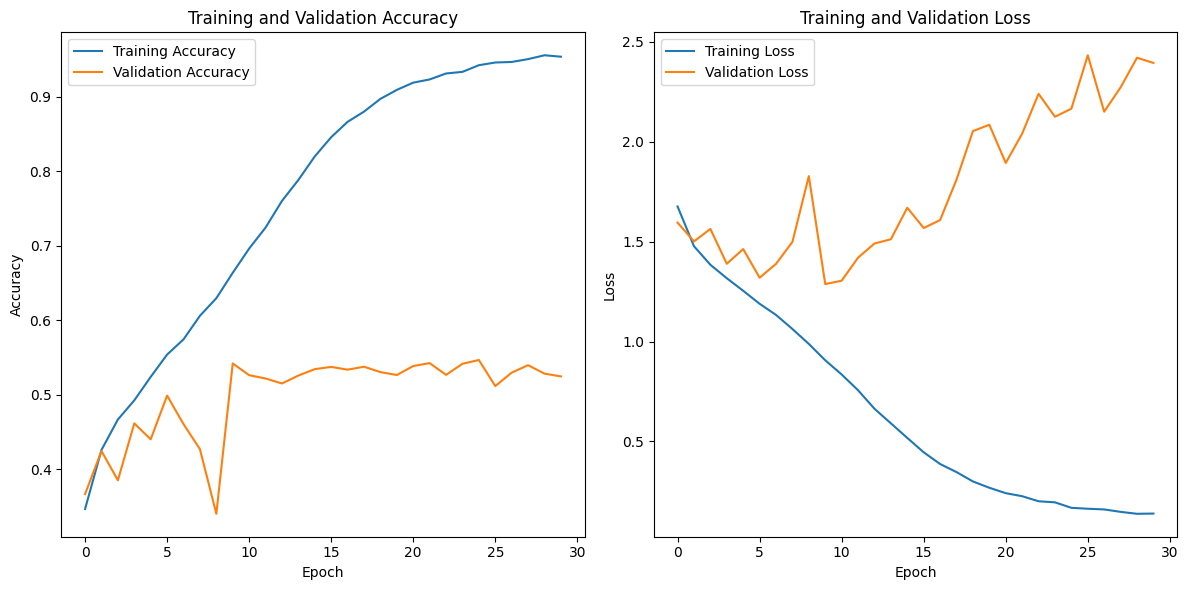

In [22]:
import matplotlib.pyplot as plt

# Access the training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# DenseNet121 Base Frozen Before Augmentation FER

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the input shape for your grayscale images
input_shape = (48, 48, 1)

# Define the number of classes in your dataset
num_classes = 7

# Create the DenseNet base model with pre-trained weights (excluding top layers)
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Lambda layer to repeat the single-channel grayscale image to three channels
input_tensor = Input(shape=input_shape)
x = Lambda(lambda x: tf.concat([x, x, x], axis=-1))(input_tensor)

# Connect the modified input tensor to the base model
x = base_model(x)

# Add custom top layers for classification
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(num_classes, activation='softmax')(x)

# Create the custom DenseNet model
densenet_model = Model(inputs=input_tensor, outputs=x)

# Compile the model
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
densenet_model.summary()

# Define a callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint("best_model_densenet121.h5", monitor="val_accuracy", mode="max", save_best_only=True)

# Train the model
epochs = 50
history = densenet_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint]
)

# Load the best saved model
densenet_model.load_weights("best_model_densenet121.h5")

# Evaluate the model on the test set
test_loss, test_accuracy = densenet_model.evaluate(test_generator, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the test set
predictions = densenet_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels of the test set
true_labels = test_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

In [ ]:
# Save the best model as an .h5 file
densenet_model.save("densenet_model.h5")

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Get the predicted probabilities for the test set
y_pred_probabilities = densenet_model.predict(test_generator)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

# Get the true class labels for the test set
y_true_labels = test_generator.classes

# Get the class names
class_names = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))

# DenseNet121 Base Trainable Before Augmentation

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the input shape for your grayscale images
input_shape = (48, 48, 1)

# Define the number of classes in your dataset
num_classes = 7

# Create the DenseNet base model with pre-trained weights (excluding top layers)
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = True

# Lambda layer to repeat the single-channel grayscale image to three channels
input_tensor = Input(shape=input_shape)
x = Lambda(lambda x: tf.concat([x, x, x], axis=-1))(input_tensor)

# Connect the modified input tensor to the base model
x = base_model(x)

# Add custom top layers for classification
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(num_classes, activation='softmax')(x)

# Create the custom DenseNet model
densenet_model = Model(inputs=input_tensor, outputs=x)

# Compile the model
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
densenet_model.summary()

# Define a callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint("best_model_densenet121_trainable_fer.h5", monitor="val_accuracy", mode="max", save_best_only=True)

# Train the model
epochs = 50
history = densenet_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint]
)

# Load the best saved model
densenet_model.load_weights("best_model_densenet121_trainable_fer.h5")

# Evaluate the model on the test set
test_loss, test_accuracy = densenet_model.evaluate(test_generator, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

29084464/29084464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 lambda (Lambda)             (None, 48, 48, 3)         0         
                                                                 
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048   

In [5]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the test set
predictions = densenet_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels of the test set
true_labels = test_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

225/225 [==============================] - 14s 53ms/step
Confusion Matrix:
[[ 519   10   99   74  120  122   14]
 [  33   45   12   10    3    7    1]
 [ 133    0  433   70  153  162   73]
 [  72    0   39 1468  111   60   24]
 [  92    3   70   99  786  171   12]
 [ 186    2  129  101  242  569   18]
 [  33    0   81   65   56    7  589]]


In [6]:
import numpy as np
from sklearn.metrics import classification_report

# Get the predicted probabilities for the test set
y_pred_probabilities = densenet_model.predict(test_generator)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

# Get the true class labels for the test set
y_true_labels = test_generator.classes

# Get the class names
class_names = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))

225/225 [==============================] - 12s 52ms/step
              precision    recall  f1-score   support

       angry       0.49      0.54      0.51       958
     disgust       0.75      0.41      0.53       111
        fear       0.50      0.42      0.46      1024
       happy       0.78      0.83      0.80      1774
     neutral       0.53      0.64      0.58      1233
         sad       0.52      0.46      0.49      1247
    surprise       0.81      0.71      0.75       831

    accuracy                           0.61      7178
   macro avg       0.62      0.57      0.59      7178
weighted avg       0.62      0.61      0.61      7178



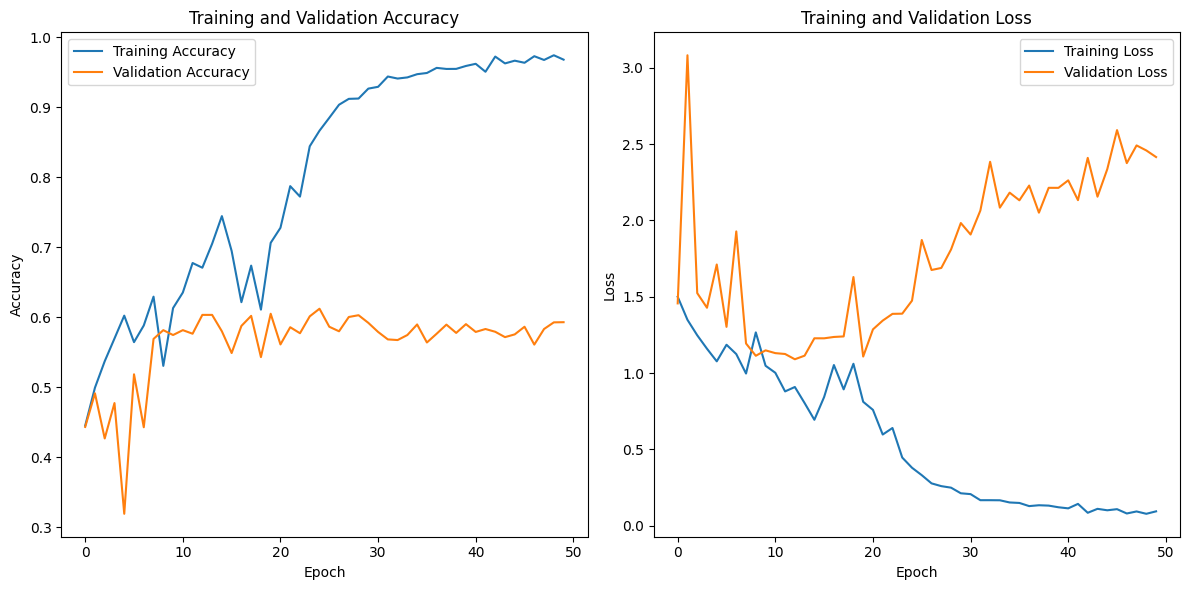

In [7]:
import matplotlib.pyplot as plt

# Access the training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# VGG16 Base Frozen Before Augmentation FER

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Lambda, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the base model's layers
base_model.trainable = False

# Repeat the grayscale channel three times
model1 = Sequential()
model1.add(Lambda(lambda x: tf.concat([x, x, x], axis=-1), input_shape=(48, 48, 1)))
model1.add(base_model)
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(num_classes, activation='softmax'))  # Replace num_classes with the number of classes in your dataset

# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model1.summary()

# Define a callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint("best_model_vgg16.h5", monitor="val_accuracy", mode="max", save_best_only=True)

# Train the model
epochs = 50
history = model1.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint]
)

# Load the best saved model
model1.load_weights("best_model_vgg16.h5")

# Evaluate the model on the test set
test_loss, test_accuracy = model1.evaluate(test_generator, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the test set
predictions = model1.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels of the test set
true_labels = test_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Get the predicted probabilities for the test set
y_pred_probabilities = model1.predict(test_generator)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

# Get the true class labels for the test set
y_true_labels = test_generator.classes

# Get the class names
class_names = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))

# VGG16 Base Trainable Before Augmentation FER

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Lambda, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the base model's layers
base_model.trainable = True

# Repeat the grayscale channel three times
model1 = Sequential()
model1.add(Lambda(lambda x: tf.concat([x, x, x], axis=-1), input_shape=(48, 48, 1)))
model1.add(base_model)
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(num_classes, activation='softmax'))  # Replace num_classes with the number of classes in your dataset

# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model1.summary()

# Define a callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint("best_model_vgg16_trainable_fer.h5", monitor="val_accuracy", mode="max", save_best_only=True)

# Train the model
epochs = 50
history = model1.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint]
)

# Load the best saved model
model1.load_weights("best_model_vgg16_trainable_fer.h5")

# Evaluate the model on the test set
test_loss, test_accuracy = model1.evaluate(test_generator, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 48, 48, 3)         0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 7)                 903       
                                                                 
Total params: 14,781,255
Trainable params: 14,781,255


In [24]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the test set
predictions = model1.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels of the test set
true_labels = test_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


225/225 [==============================] - 11s 50ms/step
Confusion Matrix:
[[ 372   14  131   81  122  226   12]
 [  44   26    9    5   11   15    1]
 [ 133    2  326  102  138  253   70]
 [  24    0   45 1514   77   95   19]
 [  59    1   59  149  708  251    6]
 [ 141    2  123  146  267  558   10]
 [  22    1  142   86   23   37  520]]


In [25]:
import numpy as np
from sklearn.metrics import classification_report

# Get the predicted probabilities for the test set
y_pred_probabilities = model1.predict(test_generator)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

# Get the true class labels for the test set
y_true_labels = test_generator.classes

# Get the class names
class_names = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))

225/225 [==============================] - 11s 49ms/step
              precision    recall  f1-score   support

       angry       0.47      0.39      0.42       958
     disgust       0.57      0.23      0.33       111
        fear       0.39      0.32      0.35      1024
       happy       0.73      0.85      0.79      1774
     neutral       0.53      0.57      0.55      1233
         sad       0.39      0.45      0.42      1247
    surprise       0.82      0.63      0.71       831

    accuracy                           0.56      7178
   macro avg       0.55      0.49      0.51      7178
weighted avg       0.56      0.56      0.55      7178



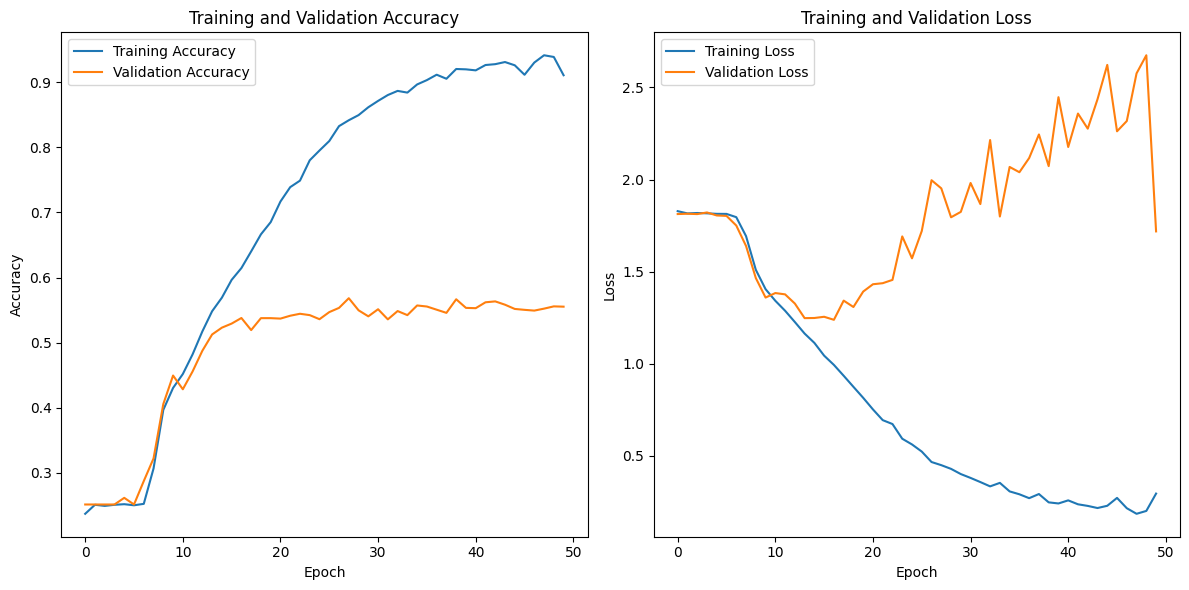

In [26]:
import matplotlib.pyplot as plt

# Access the training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# EfficientNetV2B0

In [12]:
import tensorflow as tf
base_model = tf.keras.applications.EfficientNetV2B0(include_top = False)
base_model.trainable = True

print(len(base_model.layers))

24274472/24274472 [==============================] - 0s 0us/step
270


In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.layers import Lambda
from tensorflow.keras.utils import to_categorical

# Define the input shape of your images
input_shape = (48, 48, 1)

# Set the batch size for the data generator
batch_size = 32

base_model = EfficientNetV2B0(include_top=False, input_shape=(48, 48, 3))
base_model.trainable = True

for layer in base_model.layers[:-255]:
    layer.trainable = False

# Define the model architecture
model4 = Sequential()
model4.add(Lambda(lambda x: tf.concat([x, x, x], axis=-1), input_shape=(48, 48, 1)))
model4.add(Conv2D(3, (1, 1), input_shape=(512, 512, 1), activation='relu'))
model4.add(base_model)
model4.add(GlobalAveragePooling2D())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(num_classes, activation='softmax'))  # Replace num_classes with the number of classes in your dataset

# Compile the model
model4.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

# Define a callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint("best_model_efficientnet_before_aug_fer.h5", monitor="val_accuracy", mode="max", save_best_only=True)

# Train the model
epochs = 60
history = model4.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=[checkpoint])

# Load the best saved model
model4.load_weights("best_model_efficientnet_before_aug_fer.h5")

# Evaluate the model on the test set
test_loss, test_accuracy = model4.evaluate(test_generator, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/60


2023-11-18 14:57:31.590225: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/efficientnetv2-b0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


763/763 [==============================] - 73s 66ms/step - loss: 1.8549 - accuracy: 0.2401 - val_loss: 1.7237 - val_accuracy: 0.3046
Epoch 2/60
763/763 [==============================] - 49s 64ms/step - loss: 1.7110 - accuracy: 0.3153 - val_loss: 1.6476 - val_accuracy: 0.3610
Epoch 3/60
763/763 [==============================] - 48s 63ms/step - loss: 1.6222 - accuracy: 0.3680 - val_loss: 1.5445 - val_accuracy: 0.4067
Epoch 4/60
763/763 [==============================] - 50s 65ms/step - loss: 1.5659 - accuracy: 0.3927 - val_loss: 1.4976 - val_accuracy: 0.4248
Epoch 5/60
763/763 [==============================] - 51s 66ms/step - loss: 1.5225 - accuracy: 0.4114 - val_loss: 1.4728 - val_accuracy: 0.4355
Epoch 6/60
763/763 [==============================] - 52s 68ms/step - loss: 1.4806 - accuracy: 0.4321 - val_loss: 1.4444 - val_accuracy: 0.4501
Epoch 7/60
763/763 [==============================] - 51s 67ms/step - loss: 1.4416 - accuracy: 0.4507 - val_loss: 1.4186 - val_accuracy: 0.4575
Epo

In [16]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the test set
predictions = model4.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels of the test seta
true_labels = test_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

225/225 [==============================] - 13s 49ms/step
Confusion Matrix:
[[ 393   11  104  168   96  147   39]
 [  21   56    5   14    5    8    2]
 [ 128    8  388  133  103  174   90]
 [  62    2   48 1418  107  103   34]
 [ 111    4  125  226  563  173   31]
 [ 146   11  135  213  218  501   23]
 [  29    4   67   63   42   36  590]]


In [17]:
import numpy as np
from sklearn.metrics import classification_report

# Get the predicted probabilities for the test set
y_pred_probabilities = model4.predict(test_generator)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

# Get the true class labels for the test set
y_true_labels = test_generator.classes

# Get the class names
class_names = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))

225/225 [==============================] - 11s 49ms/step
              precision    recall  f1-score   support

       angry       0.44      0.41      0.43       958
     disgust       0.58      0.50      0.54       111
        fear       0.44      0.38      0.41      1024
       happy       0.63      0.80      0.71      1774
     neutral       0.50      0.46      0.48      1233
         sad       0.44      0.40      0.42      1247
    surprise       0.73      0.71      0.72       831

    accuracy                           0.54      7178
   macro avg       0.54      0.52      0.53      7178
weighted avg       0.53      0.54      0.54      7178



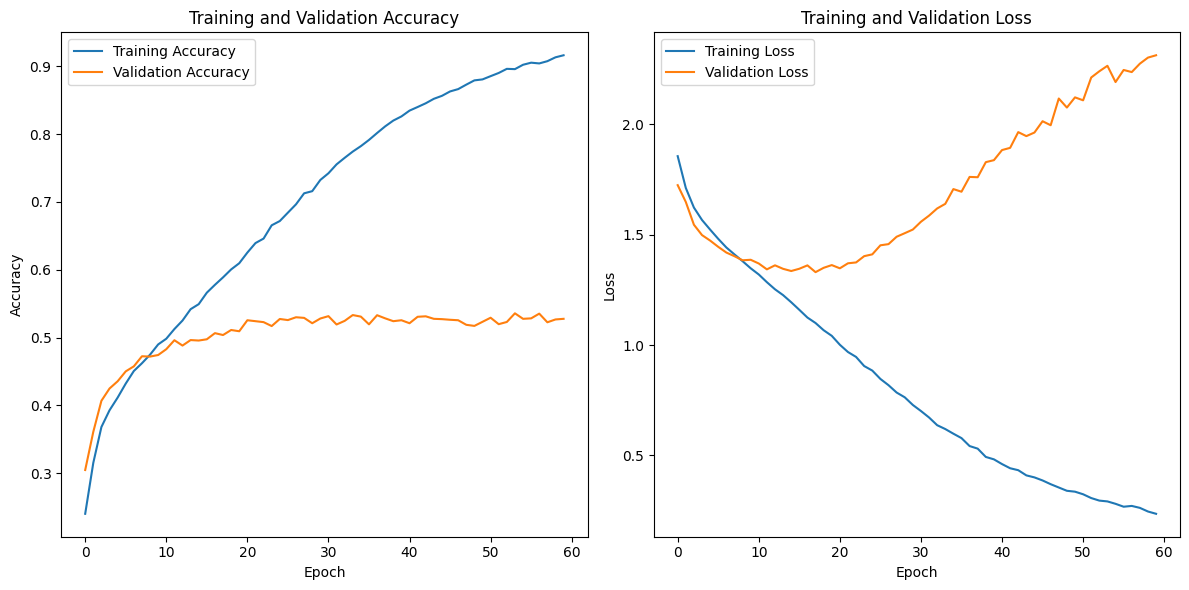

In [18]:
import matplotlib.pyplot as plt

# Access the training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
import zipfile
import os
from IPython.display import FileLink

def zip_dir(directory=os.getcwd(), file_name='directory.zip'):
    """
    Zip all the files in a directory
    
    Parameters
    ----------
    directory : str
        Directory to be zipped. Default is the current working directory.
        
    file_name : str
        The name of the zipped file (including .zip). Default is 'directory.zip'.
        
    Returns
    -------
    A hyperlink that can be used to download the zip file.
    """
    os.chdir(directory)
    zip_ref = zipfile.ZipFile(file_name, mode='w')
    for folder, _, files in os.walk(directory):
        for file in files:
            if file_name in file:
                pass
            else:
                zip_ref.write(os.path.join(folder, file))

    return FileLink(file_name)

# Define the directory to be zipped (Kaggle working directory)
directory_to_zip = '/kaggle/working'

# Specify the name of the output ZIP file
zip_file_name = 'kaggle_working_directory.zip'

# Zip the directory and provide a download link
zip_link = zip_dir(directory=directory_to_zip, file_name=zip_file_name)
zip_link
